<a href="https://colab.research.google.com/github/lucvseco/algoritmo-supervisionado/blob/main/vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CONTEXTO:**
Iremos analisar as vendas de uma loja e tentar identificar as relações e previsões das vendas com seus produtos. Tentaremos encontrar uma reta de regressão linear que o valor das vendas.

#**Importando bibliotecas**

In [ ]:
# biblioteca para manipulação de dados
import pandas as pd
import numpy as np
# bibliotecas para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# técnica de partição em treino e teste
from sklearn.model_selection import train_test_split
#Importanto técnicas de avaliação de modelos
from sklearn.metrics import accuracy_score  #métrica acurácia
from sklearn.metrics import confusion_matrix  #árvore de confusão
from sklearn.metrics import classification_report #várias métricas
from sklearn.metrics import mean_absolute_error  #métrica erro médio absoluto
# Importando as técnicas de aprendizagem (técnicas de regressão)
from sklearn.linear_model import LinearRegression  #Regressão Linear
from sklearn.svm import SVR  #técnica SVR (resolve problemas lineares e não lineares)

#**Importando dados**

In [ ]:
base_regressao = pd.read_csv("/content/anuncio.csv", sep=',')
base_regressao.head()

,Id,TV,radio,jornal,vendas
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Descrição dos Dados**

-TV: Investimento em marketing na TV R$.

-Radio: Investimento em marketing em rádios R$.

-Jornal: Investimento em marketing nos jornais R$.

-Vendas: Retorno - vendas em R$.

### **Correlação Linear**

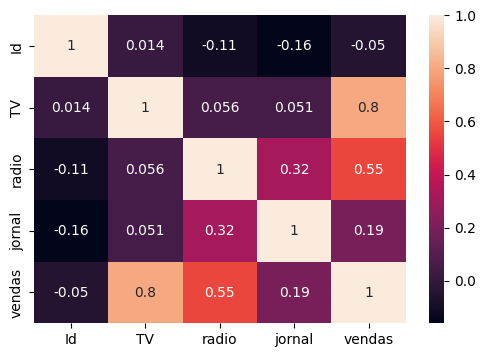

In [ ]:
#Gerando correlação Spearman

corr = base_regressao.corr(method='spearman')
features = corr.index
plt.figure(figsize=(6,4))
ax = sns.heatmap(base_regressao[features].corr(method='spearman'),annot=True)

### **Visualizando a distribuição da variável resposta**

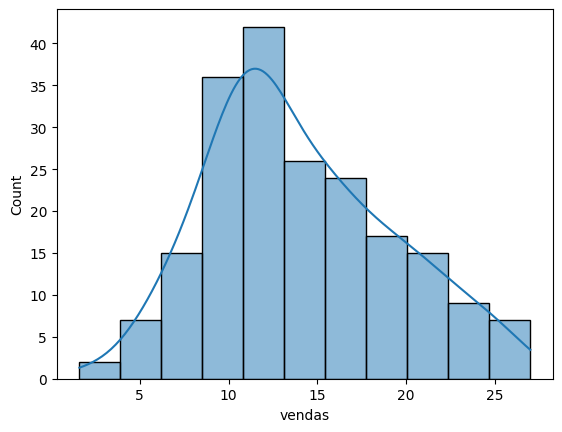

In [ ]:
sns.histplot(data=base_regressao, x="vendas", kde=True)
plt.show()

In [ ]:
# principais estatísticas para a variável resposta vendas
base_regressao['vendas'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: vendas, dtype: float64

In [ ]:
Y = base_regressao['vendas']
X = base_regressao.drop(['Id','jornal','vendas'], axis=1)

X.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


#**Avaliando modelos**

In [ ]:
#Estas listas guardam os resultados ao final de cada iteração
resultados_modelo1 = []
resultados_modelo2 = []

# definindo uma semente global
np.random.seed(14)

# início do processo iterativo
for i in range(100):

  # Separação aleatória em conjuntos de treino e teste
  X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, train_size=0.75)

  ###### Treinamento de modelos #####
  # Modelo 1 =  Regressão Linear
  model1 = LinearRegression()
  model1.fit(X, Y)

  # Modelo 2 =  SVR com kernel Não Linear
  model2 = SVR()
  model2.fit(X, Y)

  ##### Avaliação de Modelos ######
  # Estimativas na base de teste (dados não vistos/futuros)/guardando resultados nas listas
  predictions1 = model1.predict(X_teste)
  resultados_modelo1.append(mean_absolute_error(Y_teste, predictions1))

  predictions2 = model2.predict(X_teste)
  resultados_modelo2.append(mean_absolute_error(Y_teste, predictions2))

### **Equação da reta: Modelo de Regressão Linear**

In [ ]:
# Execute esse código para encontrar os coeficientes da regressão linear
print(model1.intercept_)
print(model1.coef_)

2.9210999124051362
[0.04575482 0.18799423]


Portanto, a equação da reta do modelo de regressão linear que explica o valor de vendas  é:

**Vendas = 2.92 + 0.045 * (variavel X1) + 0.18 * (variavel X2)**

### **Avaliando Modelos pelo Erro Médio Absoluto**

In [ ]:
print('Média modelo 1 / Média modelo 2:')
print(round(np.mean(resultados_modelo1),2), round(np.mean(resultados_modelo2),2),'\n')

print('Desvio padrão modelo 1 / Desvio padrão modelo 2:')
print(round(np.std(resultados_modelo1),2), round(np.std(resultados_modelo2),2))

Média modelo 1 / Média modelo 2:
1.24 1.06 

Desvio padrão modelo 1 / Desvio padrão modelo 2:
0.15 0.12


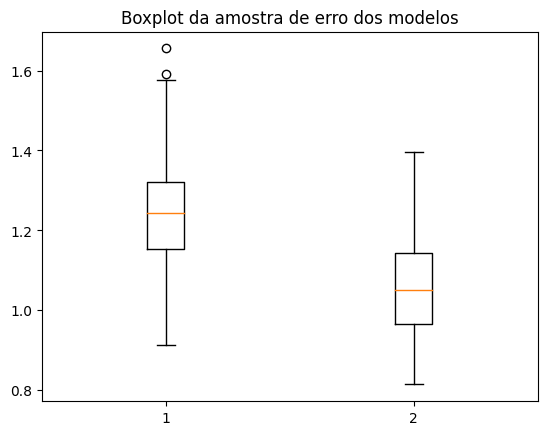

In [ ]:
# Execute este códido para visualizar o boxplot para cada modelo.
dados_resultados =[resultados_modelo1, resultados_modelo2]

plt.boxplot(dados_resultados)
plt.title("Boxplot da amostra de erro dos modelos")
plt.show()